In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('final_merged_dataset.csv')

In [3]:
df

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,Oxidation,dry,1160.350439,O2,34.56,0.199,18,710.197,...,883.0,153,582,105,none,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...,2902,13311,0,0.0525
1654,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,...,867.0,152,550,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...,2878,11133,0,0.0210
1655,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,...,868.0,152,542,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...,2821,11222,0,0.0210
1656,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,...,868.0,152,582,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...,2938,11311,0,0.0120


In [5]:
df[df.chamber_path == 11111].defective_chip_rate.mean()

0.046603448275862075

In [39]:
df.chamber_path.unique()

array([21111, 21122, 21133, 21222, 21233, 21211, 21311, 21322, 21333,
       22111, 22222, 22333, 23133, 23222, 23311, 22122, 22133, 22211,
       22233, 22311, 22322, 23111, 23333, 23122, 23211, 23233, 23322,
       33311, 31111, 31333, 32133, 32222, 32311, 33111, 33222, 33333,
       31133, 31222, 31311, 32111, 33133, 31122, 31211, 31233, 31322,
       32122, 32211, 32233, 32322, 32333, 33122, 33211, 33233, 33322,
       11111, 11222, 11333, 12133, 12222, 12311, 13111, 11311, 12111,
       12333, 13222, 13333, 11133, 13133, 13311, 11122, 11211, 11233,
       11322, 12122, 12211, 12233, 12322, 13122, 13211, 13233, 13322])

In [40]:
Instability_df = pd.DataFrame(columns = ['path', 'CL', 'UCL', 'LCL', 'count', 'error_ratio'])

In [41]:
Instability_df

,path,CL,UCL,LCL,count,error_ratio


In [42]:
CL_list = []
UCL_list = []
LCL_list = []
count_list = []
ratio_list = []

for i in df.chamber_path.unique():
    temp = df[df['chamber_path'] == i][['No_Die', 'Target', 'chamber_path']].reset_index(drop=True)
    temp_CL = temp.Target.mean()
    CL_list.append(temp_CL)
    temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
    UCL_list.append(temp_UCL)
    temp_LCL = temp_CL - 3*np.sqrt(temp_CL)
    LCL_list.append(temp_LCL)
    count_error = len(temp[(temp.Target > temp_UCL) | (temp.Target < temp_LCL)])
    count_list.append(count_error)
    temp_ratio = count_error/len(temp)
    ratio_list.append(temp_ratio)

In [43]:
temp_CL = temp.Target.mean()
temp_UCL = temp_CL + 3*np.sqrt(temp_CL)
temp_LCL = temp_CL - 3*np.sqrt(temp_CL)

# 1) error_ratio 로 정렬해서 불안정, 안정한 path 선정

In [44]:
Instability_df['path'] = df.chamber_path.unique()
Instability_df['CL'] = CL_list
Instability_df['UCL'] = UCL_list
Instability_df['LCL'] = LCL_list
Instability_df['count'] = count_list
Instability_df['error_ratio'] = ratio_list

In [45]:
Instability_df

,path,CL,UCL,LCL,count,error_ratio
0,21111,112.862069,144.733037,80.991101,13,0.448276
1,21122,96.250000,125.682125,66.817875,8,0.666667
2,21133,101.888889,132.170897,71.606881,13,0.481481
3,21222,107.609756,138.730293,76.489219,20,0.487805
4,21233,92.454545,121.300531,63.608559,7,0.636364
...,...,...,...,...,...,...
76,12322,108.250000,139.462978,77.037022,7,0.583333
77,13122,122.833333,156.082393,89.584273,3,0.250000
78,13211,75.000000,100.980762,49.019238,4,0.333333
79,13233,90.636364,119.197303,62.075424,9,0.818182


In [46]:
Instability_df.sort_values(by = 'error_ratio').head(5)

,path,CL,UCL,LCL,count,error_ratio
45,32122,80.777778,107.740715,53.814840,2,0.222222
48,32322,106.750000,137.745967,75.754033,2,0.250000
77,13122,122.833333,156.082393,89.584273,3,0.250000
58,12222,121.218750,154.248566,88.188934,8,0.250000
34,33222,74.264706,100.117798,48.411614,10,0.294118


In [47]:
Instability_df.sort_values(by = 'error_ratio').tail(5)

,path,CL,UCL,LCL,count,error_ratio
80,13322,85.416667,113.143008,57.690325,9,0.750000
41,31122,141.555556,177.248692,105.862419,7,0.777778
79,13233,90.636364,119.197303,62.075424,9,0.818182
42,31211,166.000000,204.652296,127.347704,9,1.000000
43,31233,134.777778,169.605927,99.949628,9,1.000000


In [48]:
Instability_path_list = list(Instability_df.sort_values(by = 'error_ratio').tail(5)['path'])
stability_path_list = list(Instability_df.sort_values(by = 'error_ratio').head(5)['path'])
full_list = []

In [49]:
Instability_path_list

[13322, 31122, 13233, 31211, 31233]

In [50]:
stability_path_list

[32122, 32322, 13122, 12222, 33222]

In [51]:
full_list.extend(Instability_path_list)
full_list.extend(stability_path_list)

In [52]:
temp = df.query('chamber_path in @full_list');temp

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
567,NOLSM3501326,3,Oxidation,dry,1059.003352,O2,32.91,0.197,80,707.196,...,879.0,155,542,60,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 0 0 0 0 0 0 ...,2704,33222,0,0.0300
582,NOLSM3981520,3,Oxidation,wet,1088.463298,H2O,33.59,0.208,66,717.257,...,911.0,154,542,69,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 0 0 0 0 0 0 ...,2704,33222,0,0.0345
585,NOLSM407162407,3,Oxidation,wet,1220.285144,H2O,31.50,0.194,125,715.864,...,923.0,153,542,118,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2769,31122,0,0.0590
588,NOLSM410165410,3,Oxidation,wet,1049.918599,H2O,29.77,0.204,165,727.813,...,881.0,154,542,57,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2769,31122,0,0.0285
591,NOLSM413168413,3,Oxidation,wet,1094.402314,H2O,37.22,0.199,181,700.922,...,891.0,157,542,159,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 1 2 0 0 0 0 0 0 ...,2769,31122,0,0.0795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,NOLSM3151218315,1,Oxidation,wet,1047.894094,H2O,29.05,0.216,89,699.237,...,921.0,158,550,30,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 2 0 0 0 0 0 0 ...,2813,13233,0,0.0150
1637,NOLSM3171220317,1,Oxidation,dry,1119.316231,O2,32.47,0.210,65,706.380,...,892.0,158,542,15,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0 0 0 ...,2814,13322,0,0.0075
1640,NOLSM3201223320,1,Oxidation,dry,1192.858285,O2,35.44,0.214,104,701.424,...,889.0,153,542,102,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 0 0 0 0 0 0 ...,2814,13322,0,0.0510
1643,NOLSM3231226323,1,Oxidation,dry,1055.893448,O2,42.37,0.218,89,714.415,...,909.0,154,542,122,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,2814,13322,0,0.0610


In [53]:
temp['path_type'] = temp.chamber_path.apply(lambda x: 'good_path' if x in stability_path_list else 'bad_path')

/tmp/ipykernel_5252/2165494587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['path_type'] = temp.chamber_path.apply(lambda x: 'good_path' if x in stability_path_list else 'bad_path')


In [54]:
temp

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate,path_type
567,NOLSM3501326,3,Oxidation,dry,1059.003352,O2,32.91,0.197,80,707.196,...,155,542,60,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 1 0 0 0 0 0 0 ...,2704,33222,0,0.0300,good_path
582,NOLSM3981520,3,Oxidation,wet,1088.463298,H2O,33.59,0.208,66,717.257,...,154,542,69,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 0 0 0 0 0 0 ...,2704,33222,0,0.0345,good_path
585,NOLSM407162407,3,Oxidation,wet,1220.285144,H2O,31.50,0.194,125,715.864,...,153,542,118,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2769,31122,0,0.0590,bad_path
588,NOLSM410165410,3,Oxidation,wet,1049.918599,H2O,29.77,0.204,165,727.813,...,154,542,57,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2769,31122,0,0.0285,bad_path
591,NOLSM413168413,3,Oxidation,wet,1094.402314,H2O,37.22,0.199,181,700.922,...,157,542,159,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 1 2 0 0 0 0 0 0 ...,2769,31122,0,0.0795,bad_path
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,NOLSM3151218315,1,Oxidation,wet,1047.894094,H2O,29.05,0.216,89,699.237,...,158,550,30,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 2 0 0 0 0 0 0 ...,2813,13233,0,0.0150,bad_path
1637,NOLSM3171220317,1,Oxidation,dry,1119.316231,O2,32.47,0.210,65,706.380,...,158,542,15,none,[[0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0 0 0 ...,2814,13322,0,0.0075,bad_path
1640,NOLSM3201223320,1,Oxidation,dry,1192.858285,O2,35.44,0.214,104,701.424,...,153,542,102,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 0 0 0 0 0 0 ...,2814,13322,0,0.0510,bad_path
1643,NOLSM3231226323,1,Oxidation,dry,1055.893448,O2,42.37,0.218,89,714.415,...,154,542,122,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,2814,13322,0,0.0610,bad_path


In [55]:
# 불안정 공정의 불량품률 : sum(target)/(불안정한 공정 5개에서 생성한 wafer수 * 2000) : 불안정_불량품률
# 불안정 공정의 양품률 : 1 - 불안정 공정의 불량품률
# 양품도 똑같이

In [56]:
temp_for_heatmap = temp[['No_Die','path_type','Target','defective']];temp_for_heatmap

,No_Die,path_type,Target,defective
567,NOLSM3501326,good_path,60,0
582,NOLSM3981520,good_path,69,0
585,NOLSM407162407,bad_path,118,0
588,NOLSM410165410,bad_path,57,0
591,NOLSM413168413,bad_path,159,0
...,...,...,...,...
1635,NOLSM3151218315,bad_path,30,0
1637,NOLSM3171220317,bad_path,15,0
1640,NOLSM3201223320,bad_path,102,0
1643,NOLSM3231226323,bad_path,122,0


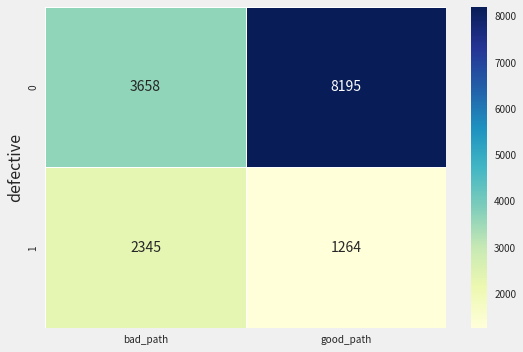

In [57]:
sns.heatmap(pd.pivot_table(temp_for_heatmap, columns='path_type', values = 'Target', index= 'defective', aggfunc='sum'), annot=True, fmt='d', cmap= 'YlGnBu', linewidth=0.5)
plt.xlabel('')
plt.ylabel('defective',fontsize=16)
plt.show()

In [61]:
pd.pivot_table(temp_for_heatmap, columns='path_type', values = 'Target', index= 'defective', aggfunc='sum')

path_type,bad_path,good_path
defective,,
0,3658,8195
1,2345,1264


In [58]:
temp_for_chi2 = pd.DataFrame({'defective_0' : [3658, 8195], 'defective_1' : [2345, 1264]})

In [59]:
chi,pval,dof,expected = stats.chi2_contingency(temp_for_chi2.T)

print('chi-square test')
print('chi-sq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chi-sq: 1354.252
p: 0.000


In [7]:
1658*0.02

33.160000000000004

In [8]:
88*2000*0.95

167200.0